<a href="https://colab.research.google.com/github/nuraishasb/chasingflights/blob/main/R_supervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 | Introduction

In this report, we experiment the use of machine learning operators, mainly Supervised Learning, on 2 different data sets. We begin with the Classification analysis on the Breast Cancer data set, before moving on to the Regression analysis on the Boston data set.

# 2 | Classification Task

Classification is a type of supervised machine learning where algorithms learn from the data to predict an outcome or event in the future. In this part of the report, we will be using the Breast Cancer data set to predict the diagnosis of breast cancer. https://archive.ics.uci.edu/dataset/45/heart+disease for more details of the data set.

### 2.1: EDA

We use exploratory data analysis (EDA) to investigate data sets and summarize their main characteristics, which can be done by employing data visualization methods.

The `str()` function provides information of the structure of the variables. It can be seen that the data set is mostly made up of numerical variables, with the the exception of variables `id`, `diagnosis` and `X`.

In [ ]:
install.packages("googledrive")
library(googledrive)
drive_auth(use_oob = TRUE)

data <- read.csv('/content/breastcancer.csv')

In [ ]:
#load data
BreastCancer <- read.csv('breastcancer.csv')

#examining the structure of the data set
str(BreastCancer)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1

Variable `X` is redundant as it does not contain any valuable information hence we remove it. The `is.na()` function checks the NA field in a data frame. We take the sum of the function to find the total number of NA values in our data set, which is 0.

In [ ]:
#removing column `X`
BC <- BreastCancer[,-33]

#Finding if there are NA values
sum(is.na(BC))

[1] 0

The `diagnosis` variable is made up of solely 'M's and 'N's where M stands for malignant and B stands for benign. By tabulating the data, we can deduce that there are more number of observations of benign breast cancer tumors than malignant ones.

In [ ]:
#tabulating the binary variable `target`
table(BC$diagnosis)


  B   M 
357 212 

As mentioned above, our aim in this section of the report is to predict the diagnosis of breast cancer, given the measurements of the tumor and breast mass. Thus, our independent variable is the `diagnosis` variable. We start off by converting the variable into binary, where Malignant takes the value 1, and 0 for Benign.

In [ ]:
#convert `diagnosis` to binary: benign and malignant
diagnosis01 <-  rep(0, length(BC$diagnosis)) #create vector of 0s of length `diagnosis`
diagnosis01[BC$diagnosis=='M'] <- 1 #condition where if `diagnosis` = M, turn it to 1
BC <- data.frame(BC, diagnosis01) #adding to the data frame

Next, we investigate the association between `diagnosis01` to the other features. We do so by using the `cor()` function, which measures the correlation coefficient value between two vectors.

In [ ]:
cor <- cor(BC[,-1:-2]) #correlation of data set, excluding columns 1 and 2
results <- as.table(cor[,31]) #table of correlations between `diagnosis1' with other variables
results

            radius_mean            texture_mean          perimeter_mean 
            0.730028511             0.415185300             0.742635530 
              area_mean         smoothness_mean        compactness_mean 
            0.708983837             0.358559965             0.596533678 
         concavity_mean     concave.points_mean           symmetry_mean 
            0.696359707             0.776613840             0.330498554 
 fractal_dimension_mean               radius_se              texture_se 
           -0.012837603             0.567133821            -0.008303333 
           perimeter_se                 area_se           smoothness_se 
            0.556140703             0.548235940            -0.067016011 
         compactness_se            concavity_se       concave.points_se 
            0.292999244             0.253729766             0.408042333 
            symmetry_se    fractal_dimension_se            radius_worst 
           -0.006521756             0.077972417    

Possible values of the correlation coefficient range from -1 to +1, with -1 indicating a perfectly linear negative, and +1 indicating a perfectly linear positive correlation. A correlation coefficient close to 0 suggests little, if any, correlation. The other features seem most likely to be useful in predicting `diagnosis01` are: radius_mean, perimeter_mean, area_mean, concave.points_mean, radius_worst, perimeter_worst, area_worst, and concave.points_worst.

### 2.2: Prediction Diagnosis of Breast Cancer

We begin the analysis by splitting the data, using the 70/30 ratio.

In [ ]:
#to make sure we get the same results for randomization
set.seed(13)

#taking 70% of the data for training
train.size <-  nrow(BC) * 0.7

#taking a sample of the total rows by the number of train.size
train <-  sample(1:nrow(BC), train.size) #sample of the rows of the training set
test <-  -train #the other 30% for test - this is done by indexing.

#subsetting the data set by the train and test rows respectively
BC.train <-  BC[train, ]
BC.test <-  BC[test, ]
diagnosis01.test <-  diagnosis01[test]

#### 2.2.1: Linear Discriminant Analysis

The linear discriminant analysis (LDA) finds a linear combination of features that best separates the classes in a data set. We will be using the `lda()` function from the `MASS` package to fit the LDA model to our data.

In [ ]:
#load the package
library(MASS)

#learn the model on train set
lda.fit <-  lda(diagnosis01 ~ radius_mean + perimeter_mean + area_mean + concave.points_mean + radius_worst
                + perimeter_worst + area_worst + concave.points_worst,
                data = BC.train)
lda.fit #view model output

#predicting on test set
lda.pred <- predict(lda.fit, BC.test)
names(lda.pred)
head(lda.pred$class) #view predicted class for first six observations in test set
head(lda.pred$posterior) #view posterior probabilities for first six observations in test set
head(lda.pred$x) #view linear discriminants for first six observations in test set


#finding misclassification error rate (MER), which gives the proportion of incorrect predictions
mean(lda.pred$class != diagnosis01.test)
LDAMER <- mean(lda.pred$class != diagnosis01.test)

Call:
lda(diagnosis01 ~ radius_mean + perimeter_mean + area_mean + 
    concave.points_mean + radius_worst + perimeter_worst + area_worst + 
    concave.points_worst, data = BC.train)

Prior probabilities of groups:
        0         1 
0.6482412 0.3517588 

Group means:
  radius_mean perimeter_mean area_mean concave.points_mean radius_worst
0    12.17950       78.34996  464.2903          0.02667181     13.42559
1    17.55879      116.16007  986.3771          0.09022679     21.26043
  perimeter_worst area_worst concave.points_worst
0        87.44453   561.3868            0.0768624
1       142.60050  1437.0136            0.1858921

Coefficients of linear discriminants:
                              LD1
radius_mean          -0.841894415
perimeter_mean       -0.125061066
area_mean             0.012546995
concave.points_mean  17.311321903
radius_worst          1.615371361
perimeter_worst      -0.002705764
area_worst           -0.009538506
concave.points_worst  9.631020355

[1] "class"     "posterior" "x"

[1] 1 1 1 1 1 0
Levels: 0 1

,0,1
3,1.265956e-05,0.9999873
4,1.029342e-05,0.9999897
7,6.140966e-04,0.9993859
8,9.524947e-02,0.9047505
10,4.141766e-02,0.9585823
11,6.150928e-01,0.3849072


,LD1
3,3.8373071
4,3.8948092
7,2.7583708
8,1.3289242
10,1.5764263
11,0.5730318


[1] 0.0877193

***LDA has a 8.77% test error rate.**

#### 2.2.2: Quadratic Discriminant Analysis

The quadratic discriminant analysis (QDA) finds a non-linear combination of features that best separates the classes in a data set. Similarly, we will be using the `qda()` function from the `MASS` package to fit the QDA model to our data.

In [ ]:
# learn the model
qda.fit <-  qda(diagnosis01 ~ radius_mean + perimeter_mean + area_mean + concave.points_mean + radius_worst
                + perimeter_worst + area_worst + concave.points_worst,
                data = BC.train)

# form the prediction on test set
qda.pred <-  predict(qda.fit, BC.test)
names(qda.pred)
head(qda.pred$class) #view predicted class for first six observations in test set
head(qda.pred$posterior) #view posterior probabilities for first six observations in test set


#compute estimate of test error.
#mean where prediction does not match the real value
mean(qda.pred$class != diagnosis01.test)
QDAMER <- mean(qda.pred$class != diagnosis01.test)

[1] "class"     "posterior"

[1] 1 1 1 1 1 1
Levels: 0 1

,0,1
3,8.260391e-118,1
4,3.172709e-20,1
7,4.348630e-97,1
8,7.383542e-13,1
10,1.070304e-10,1
11,1.013080e-19,1


[1] 0.05847953

**QDA has a 5.85% test error rate.**

#### 2.2.3: Logistic Regression

Logistic regression predicts the categorical dependent variable using a given set of independent variables. We will be using the `glm()` function and specify `family=”binomial”` so that R fits a logistic regression model to the data set. GLM stands for general linear model.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis01 ~ radius_mean + perimeter_mean + area_mean + 
    concave.points_mean + radius_worst + perimeter_worst + area_worst + 
    concave.points_worst, family = binomial, data = BC.train)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)  
(Intercept)          -0.06650   13.19228  -0.005   0.9960  
radius_mean           2.22045    5.80321   0.383   0.7020  
perimeter_mean       -0.20649    0.63727  -0.324   0.7459  
area_mean            -0.04627    0.03904  -1.185   0.2359  
concave.points_mean  77.19324   47.28673   1.632   0.1026  
radius_worst         -2.76489    2.49443  -1.108   0.2677  
perimeter_worst      -0.03212    0.16584  -0.194   0.8464  
area_worst            0.07016    0.02840   2.470   0.0135 *
concave.points_worst 34.17197   19.31499   1.769   0.0769 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 516.229  on 397  degrees o

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘maps’, ‘proxy’, ‘fields’, ‘CircStats’, ‘dtw’


Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

Loading required package: boot

Loading required package: CircStats

Loading required package: dtw

Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:spam’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, 

[1] 0.06432749

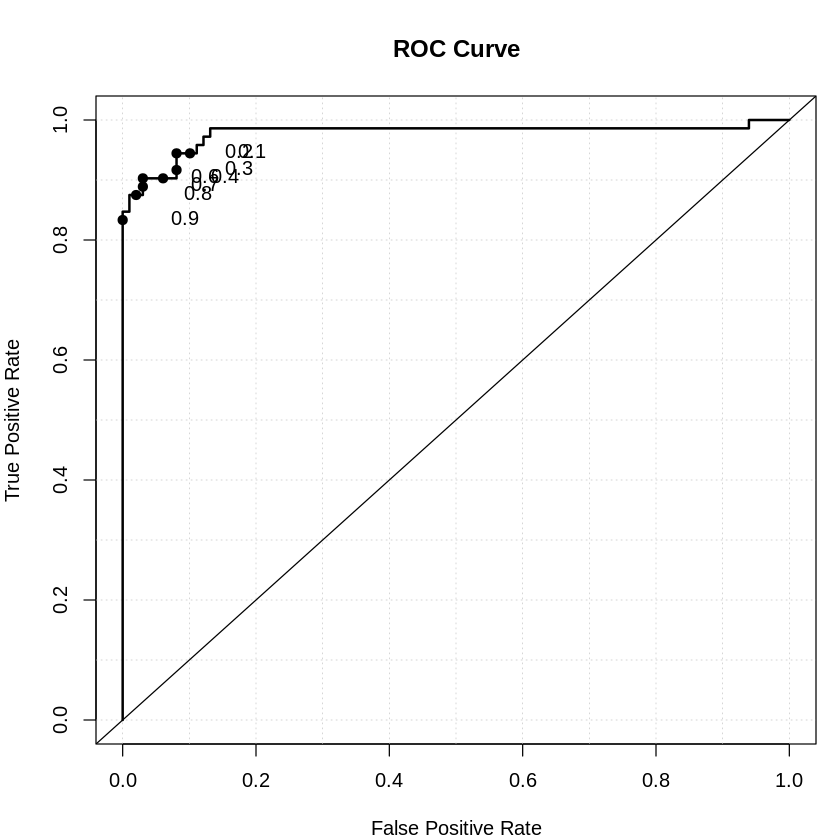

In [ ]:
#learn model: trained on training data
glm.fit <-  glm(diagnosis01 ~ radius_mean + perimeter_mean + area_mean + concave.points_mean + radius_worst
                + perimeter_worst + area_worst + concave.points_worst,
              data = BC.train,
              family = binomial)
summary(glm.fit) #view model summary

#obtain predictions on test set
glm.probs <-  predict(glm.fit, BC.test, type = "response") #probability that each observation is malignant
#using a threshold to decide on final diagnosis
glm.pred <-  rep(0, length(glm.probs))
glm.pred[glm.probs > 0.7] <- 1 #threshold chosen is 0.7

#creating ROC curve
install.packages("verification")
library(verification)
roc.plot(diagnosis01.test, glm.probs, xlab = "False Positive Rate",
ylab = "True Positive Rate")

#evaluate prediction quality
mean(glm.pred != diagnosis01.test)
LogRegMER <- mean(glm.pred != diagnosis01.test)

**Logistic Regression has a 6.43% test error rate.**

#### 2.2.4: K-Nearest Neighbour

The K-Nearest Neighbor (KNN) algorithm stores all the available data and classifies a new data point based on the similarity. We will be using the `knn()` function from the `class` package to fit the KNN model to our data.


In [ ]:
library(class)

#binding the feature values by column for the train and test set respectively.
train.X <- cbind(BC$radius_mean, BC$perimeter_mean, BC$area_mean, BC$concave.points_mean, BC$radius_worst, BC$perimeter_worst, BC$area_worst, BC$concave.points_worst)[train,]

test.X <- cbind(BC$radius_mean, BC$perimeter_mean, BC$area_mean, BC$concave.points_mean, BC$radius_worst, BC$perimeter_worst, BC$area_worst, BC$concave.points_worst)[test,]

train.diagnosis01 <-  diagnosis01[train]

set.seed(13)
# KNN (k=2)
knn.pred2 <-  knn(train.X, test.X, train.diagnosis01, k = 2)
mean(knn.pred2 != diagnosis01.test)
KNN2MER <- mean(knn.pred2 != diagnosis01.test)

# KNN (k=20)
knn.pred20 <-  knn(train.X, test.X, train.diagnosis01, k = 20)
mean(knn.pred20 != diagnosis01.test)
KNN20MER <- mean(knn.pred20 != diagnosis01.test)

# KNN (k=200)
knn.pred200 <-  knn(train.X, test.X, train.diagnosis01, k = 200)
mean(knn.pred200 != diagnosis01.test)
KNN200MER <- mean(knn.pred200 != diagnosis01.test)

[1] 0.1111111

[1] 0.0877193

[1] 0.1812865

**k=2 has a 11.1% test error rate. k=20 has 8.77% test error rate. k=200 has a 18.1% test error rate. K of 20 seems to perform the best.**

### 2.3: Final Analyisis

In [ ]:
#creating a table of overall results
mervalues <- matrix(c(LDAMER, QDAMER, LogRegMER, KNN2MER, KNN20MER, KNN200MER), ncol=1)
colnames(mervalues) <- c('MER values')
rownames(mervalues) <- c('LDA','QDA','Log Reg', 'KNN (K=2)', 'KNN (K=20)', 'KNN (K=200)')
as.table(mervalues)

            MER values
LDA         0.08771930
QDA         0.05847953
Log Reg     0.06432749
KNN (K=2)   0.11111111
KNN (K=20)  0.08771930
KNN (K=200) 0.18128655

**QDA achieved the lowest test error rate.**

# 3 | Supervised Learning: Regression

Regression is a type of supervised machine learning where algorithms learn from the data to predict a continuous value. In this part of the report, we will be using the Boston data set from the MASS package to predict the median value of owner-occupied homes in suburbs of Boston.

### 3.1: EDA

Once again, we start off with some exploratory data analysis.

In [ ]:
#loading the data
library(MASS)

#observing the structure
str(Boston)

#checking for NA value
sum(is.na(Boston))

#summary of `medv` variable
summary(Boston$medv)

#observing correlation
pairs(Boston)

### 3.2: Predicting the Median Housing Value in Boston

We start off by splitting the data into training and testing sets using the same 70/30 ratio.

In [ ]:
#split the data
train.size2 <-  nrow(Boston) * 0.7 #taking 70% of the data for training

#taking a sample of the total rows by the number of train.size
train2 <-  sample(1:nrow(Boston), train.size2) #sample of the rows of the training set
test2 <-  -train2 #the other 30% for test - this is done by indexing.

#subset the Boston data set by the train and test rows respectively
Boston.train <-  Boston[train2, ]
Boston.test <-  Boston[test2, ]

#### 3.2.1: Linear Regression

Linear regression model is a basic and commonly used type of predictive analysis - it assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship.

In [ ]:
#fitting a linear model using least squares on training data
lm.fit <-  lm(medv ~ . , data = Boston.train)
#view model summary
summary(lm.fit)

#predicting on test data
lm.pred <-  predict(lm.fit, Boston.test)

#evaluate prediction quality using MSE
mean((Boston.test[, "medv"] - lm.pred)^2)
MSELM <- mean((Boston.test[, "medv"] - lm.pred)^2)

**Least Squares has a MSE of 27.79.**

try another one with squared variables or something

#### 3.2.2: Best Subset

The best subset algorithm helps us pick the best model out of the many models we can potentially build with 13 features and one target. The `regsubsets()` function is for model selection, done by exhaustive search. It fits the input to every output/group of outputs, compare the models and find the one with the least error/BIC.

In [ ]:
library(leaps)

#model selection
regfit.full <- regsubsets(medv ~ . , data = Boston.train, nvmax=15)

reg.summary <- summary(regfit.full)
best.model <- which.min(reg.summary$bic) #number of variables with the smallest BIC value
#plotting the BIC curve across the number of variables
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(best.model,reg.summary$bic[best.model], col="red",cex=2,pch=20)

#predictions on test set
Xtest <- model.matrix(medv ~ . , data = Boston.test) # get matrix X for test data
#taking the estimated parameters from the model with lowest BIC
coefbest <- coef(regfit.full,best.model)
coefbest
#'%*%' means matrix multiplication
pred <- Xtest[,names(coefbest)]%*%coefbest # Xbeta

#3. MSE
mean((Boston.test$medv-pred)^2)
MSEBS <- mean((Boston.test$medv-pred)^2)

**Best Subsets has a MSE of 31.01.**

#### 3.2.3: Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. We’ll use the `glmnet()` function to fit the ridge regression model and specify `alpha=0`.

In [ ]:
set.seed(1)
library(glmnet)
train.mat <-  model.matrix(medv ~ . , data = Boston.train)
test.mat <-  model.matrix(medv ~ . , data = Boston.test)

#cross validation code to find lambda value
grid <-  10 ^ seq(4, -2, length = 100)
mod.ridge <-  cv.glmnet(train.mat, Boston.train[, "medv"],
                        alpha = 0, lambda = grid, thresh = 1e-12)
lambda.best <-  mod.ridge$lambda.min
lambda.best

#prediction
ridge.pred <-  predict(mod.ridge, newx = test.mat, s = lambda.best)
mean((Boston.test[, "medv"] - ridge.pred)^2)
MSERidge <- mean((Boston.test[, "medv"] - ridge.pred)^2)

**Ridge Regression has a MSE of 27.86.**

####3.2.4: Lasso Regression

Lasso regression is another model tuning method, similar to ridge, that is used to analyse data with multicollinearity present. We’ll use the `glmnet()` function as well to fit the lasso regression model but specify `alpha=1` instead.

In [ ]:
#cross validation code to find lambda value
mod.lasso <-  cv.glmnet(train.mat, Boston.train[, "medv"],
                        alpha = 1, lambda = grid, thresh = 1e-12)
lambda.best <-  mod.lasso$lambda.min
lambda.best

#prediction
lasso.pred <-  predict(mod.lasso, newx = test.mat, s = lambda.best)
mean((Boston.test[, "medv"] - lasso.pred)^2)
MSELasso <- mean((Boston.test[, "medv"] - lasso.pred)^2)

#obtain the coefficient estimates
mod.lasso <-  glmnet(model.matrix(medv ~ . , data = Boston),
                     Boston[, "medv"], alpha = 1)
predict(mod.lasso, s = lambda.best, type = "coefficients")

**Lasso Regression has a MSE of 27.81.**

### 3.3: Final Analysis

In [ ]:
#creating a table of overall results
msevalues <- matrix(c(MSELM, MSEBS, MSERidge, MSELasso), ncol=1)
colnames(msevalues) <- c('MSE values')
rownames(msevalues) <- c('Least Squares','Best Subset','Ridge', 'Lasso')
as.table(msevalues)

**Least Squares is the best performing model with the smallest MSE value.**